### <p style="text-align: center;">Crime Data Analysis and Prediction <br> City of Philadelphia <br/> Final Project Code</p>
#### <p style="text-align: center;">DSC680 – Applied Data Science <br/> Winter 2021 <br/> Manish Kalkar</p>
### <p style="text-align: center;">Milestone 3 - Exploratory Data Analysis / Data Visualization / Modeling</p>

### Exploratory Data Analysis

#### Load Libraries

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_process import arma_generate_sample, ArmaProcess

import warnings
warnings.filterwarnings("ignore")

#### Load the dataset into the DataFrame

In [3]:
# Load the dataset into the DataFrame
df_crime = pd.read_csv("crime.csv")

#### Display the data

In [4]:
# Display the data
df_crime

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800.0,Other Assaults,NaN,2009-10,NaN,NaN
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600.0,All Other Offenses,NaN,2009-05,NaN,NaN
2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800.0,Other Assaults,NaN,2009-08,NaN,NaN
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,Weapon Violations,20.0,2009-07,-75.130477,40.036389
4,9,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600.0,All Other Offenses,8.0,2009-06,-75.166350,39.969532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2237600,1,1,2017-01-17 09:13:00,2017-01-17,09:13:00,9,201701002678,2100 BLOCK S BROAD ST,2600.0,All Other Offenses,1.0,2017-01,-75.169992,39.923556
2237601,16,1,2017-01-17 22:35:00,2017-01-17,22:35:00,22,201716002117,N 38TH ST / WALLACE ST,2600.0,All Other Offenses,12.0,2017-01,-75.197627,39.964593
2237602,16,1,2017-01-17 22:35:00,2017-01-17,22:35:00,22,201716002118,N 38TH ST / WALLACE ST,2600.0,All Other Offenses,12.0,2017-01,-75.197627,39.964593
2237603,19,2,2017-01-18 01:23:00,2017-01-18,01:23:00,1,201719004939,6000 BLOCK HAVERFORD AV,2600.0,All Other Offenses,15.0,2017-01,-75.240163,39.970507


In [5]:
# Find the total number of rows (customer reviews) in DatFrame
df_crime.shape

(2237605, 14)

#### Data Attributes

In [6]:
# Display columns of the DataFrame
# iterating through the columns
for crime_columns in df_crime.columns:
    print(crime_columns)

Dc_Dist
Psa
Dispatch_Date_Time
Dispatch_Date
Dispatch_Time
Hour
Dc_Key
Location_Block
UCR_General
Text_General_Code
Police_Districts
Month
Lon
Lat


In [7]:
# Display columns of the DataFrame with data types and not null count
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237605 entries, 0 to 2237604
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Dc_Dist             int64  
 1   Psa                 object 
 2   Dispatch_Date_Time  object 
 3   Dispatch_Date       object 
 4   Dispatch_Time       object 
 5   Hour                int64  
 6   Dc_Key              int64  
 7   Location_Block      object 
 8   UCR_General         float64
 9   Text_General_Code   object 
 10  Police_Districts    float64
 11  Month               object 
 12  Lon                 float64
 13  Lat                 float64
dtypes: float64(4), int64(3), object(7)
memory usage: 239.0+ MB


### Data Preparation and Feature Engineering

In [8]:
# remove all na values from the dataset
df_crime = df_crime.dropna()

In [9]:
# changing dtype police district to int
df_crime = df_crime.astype({'Police_Districts': 'int64'})

In [10]:
# order based on date
df_crime['Dispatch_Date_Time'] = pd.to_datetime(df_crime['Dispatch_Date_Time'])
df_crime = df_crime.sort_values(by='Dispatch_Date_Time', ascending=True)

In [11]:
# creating a seperate list for each year, month and day 
df_crime['Year_Nr'] = df_crime['Dispatch_Date_Time'].dt.year
df_crime['Month_Nr'] = df_crime['Dispatch_Date_Time'].dt.month
df_crime['Day_Nr'] = df_crime['Dispatch_Date_Time'].dt.day

In [12]:
# removing the year 2017 since it's not a complete year
df_crime = df_crime[df_crime.Year_Nr != 2017]

In [13]:
df_crime

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat,Year_Nr,Month_Nr,Day_Nr
1038493,3,I,2006-01-01 00:00:00,2006-01-01,00:00:00,0,200603000002,S 8TH ST /SOUTH ST,2600.0,All Other Offenses,3,2006-01,-75.155491,39.942416,2006,1,1
1338793,19,R,2006-01-01 00:02:00,2006-01-01,00:02:00,0,200619000047,5500 BLOCK CHERRY ST,800.0,Other Assaults,15,2006-01,-75.231975,39.963220,2006,1,1
1389932,3,I,2006-01-01 00:02:00,2006-01-01,00:02:00,0,200603000001,S 8TH ST /SOUTH ST,2600.0,All Other Offenses,3,2006-01,-75.155491,39.942416,2006,1,1
1325562,18,Q,2006-01-01 00:04:00,2006-01-01,00:04:00,0,200618000007,400 BLOCK S 55TH ST,1500.0,Weapon Violations,14,2006-01,-75.232374,39.953490,2006,1,1
1395649,12,P,2006-01-01 00:05:00,2006-01-01,00:05:00,0,200612000011,1700 BLOCK S 58TH ST,1500.0,Weapon Violations,9,2006-01,-75.230711,39.937644,2006,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138831,24,1,2016-12-31 23:37:00,2016-12-31,23:37:00,23,201624125119,3200 BLOCK EMERALD ST,800.0,Other Assaults,17,2016-12,-75.108979,39.995515,2016,12,31
2150159,14,4,2016-12-31 23:43:00,2016-12-31,23:43:00,23,201714000029,8400 BLOCK MICHENER AV,900.0,Arson,10,2016-12,-75.174165,40.078948,2016,12,31
2150080,6,3,2016-12-31 23:44:00,2016-12-31,23:44:00,23,201606056819,1200 BLOCK CHANCELLOR ST,600.0,Thefts,5,2016-12,-75.161632,39.948579,2016,12,31
2139544,2,3,2016-12-31 23:46:00,2016-12-31,23:46:00,23,201702000001,7600 BLOCK CENTRAL AVE,800.0,Other Assaults,2,2016-12,-75.087071,40.068649,2016,12,31


### Graphical Analysis

### 1. Plot - Total number of crimes commited per Year

Text(0.5, 1.0, 'Total number of crimes commited per year')

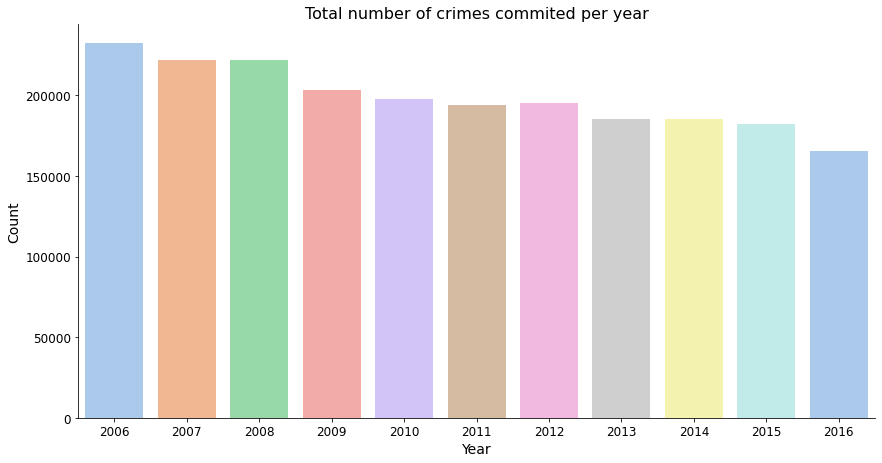

In [14]:
# Total number of crimes commited per year
sns.catplot(x='Year_Nr',
            kind='count',
            palette=("pastel"),
            height=6,
            aspect=2,
            data=df_crime)

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Total number of crimes commited per year", fontsize=16)

#### Almost every year there is a decrease in the number of crimes happening.

### 2. Number of crimes commited per Month

Text(0.5, 1.0, 'Number of Crimes Commited per Month')

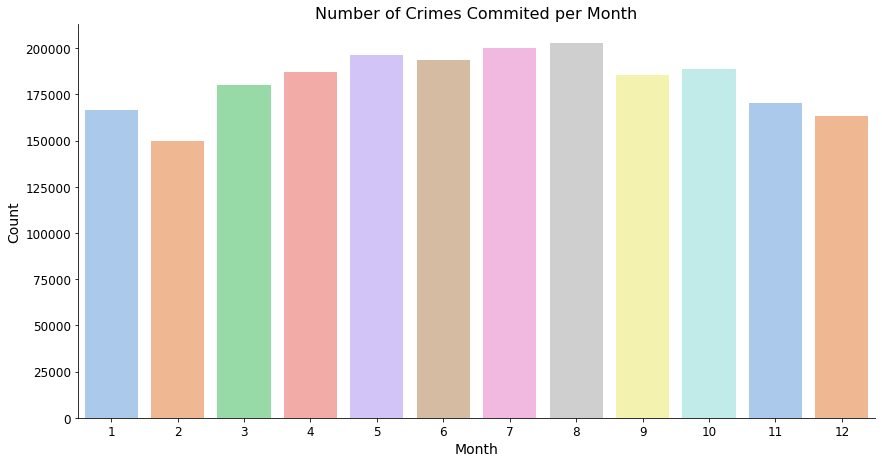

In [17]:
# Number of crimes commited per Month
sns.catplot(x='Month_Nr',
           kind='count',
           height=6,
           aspect=2,
           palette=("pastel"),
           data=df_crime)

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Number of Crimes Commited per Month", fontsize=16)

### 3. Number of crimes commited per Hour

Text(0.5, 1.0, 'Number of Crimes Commited per Hour')

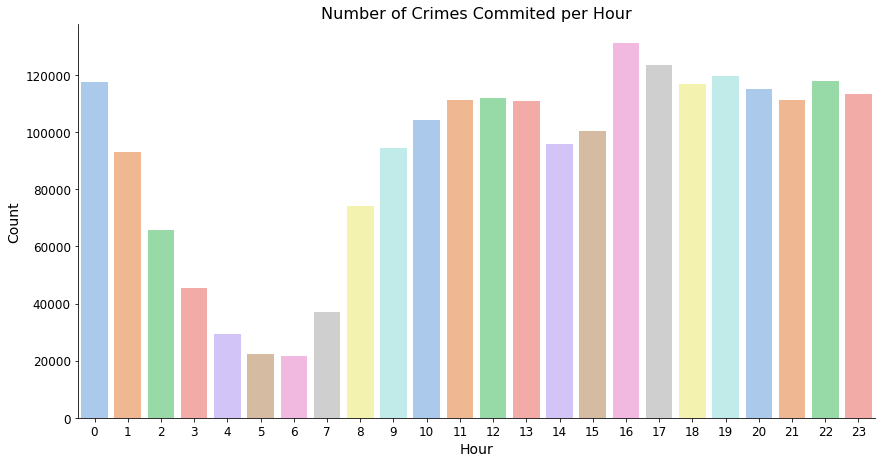

In [18]:
# Number of crimes commited per hour¶
sns.catplot(x='Hour',
           kind='count',
           height=6,
           aspect=2,
           palette=("pastel"),
           data=df_crime)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Number of Crimes Commited per Hour", fontsize=16)

#### Number of crimes happening reaches a peak at 16:00h and is at its lowest point around 06:00h.

### 4. Number of Times a Specific Crime was Commited

Text(0.5, 1.0, 'Number of Times a Specific Crime was Commited')

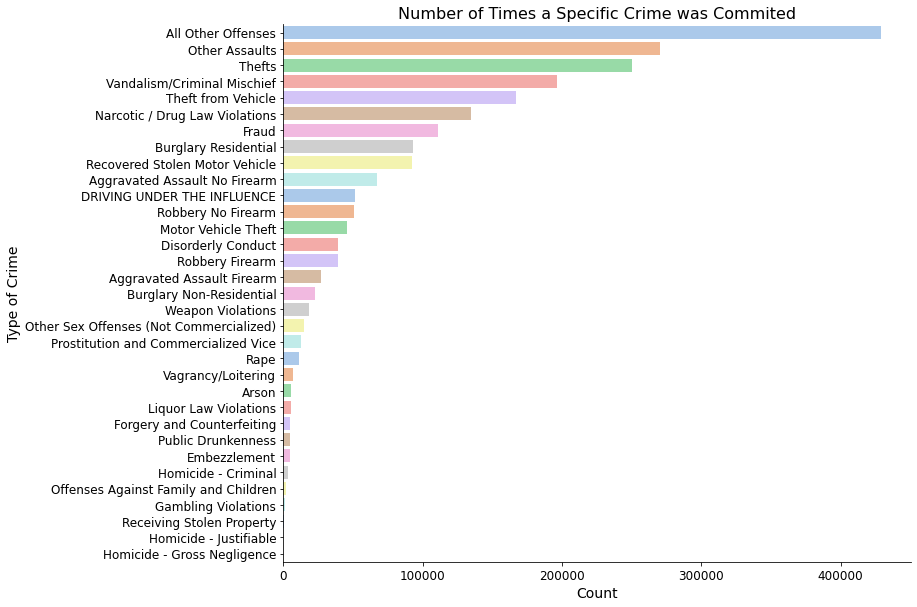

In [20]:
# Number of Times a Specific Crime was Commited
sns.catplot(y='Text_General_Code',
           kind ='count',
           height = 8,
           aspect =1.5, 
           palette=("pastel"),
           order=df_crime.Text_General_Code.value_counts().index,
           data=df_crime)

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Type of Crime", fontsize=14)
plt.title("Number of Times a Specific Crime was Commited", fontsize=16)

#### The category Assualts and Theft are crimes that are commited the most within Philadelphia

### 5. Number of Crimes Committed per Police District

Text(0.5, 1.0, 'Number of Crimes Commited per Police District')

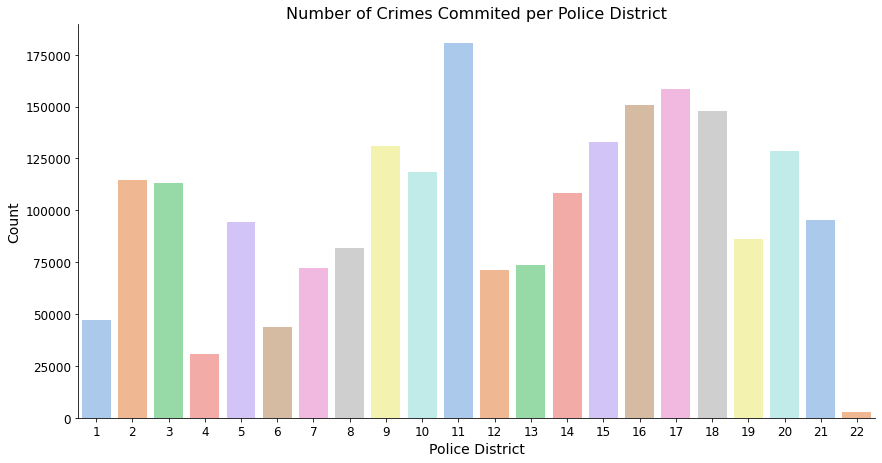

In [21]:
# Number of Times a Specific Crime was Commited
sns.catplot(x='Police_Districts',
           kind='count',
           height=6,
           aspect=2,
           palette=("pastel"),
           data=df_crime)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Police District", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Number of Crimes Commited per Police District", fontsize=16)

#### Above the number of times a crime is commited in each district is visualized. From this we can see that most crimes happen district 11

### 6. Number of crimes by Day

Text(0.5, 1.0, 'number of crimes by day')

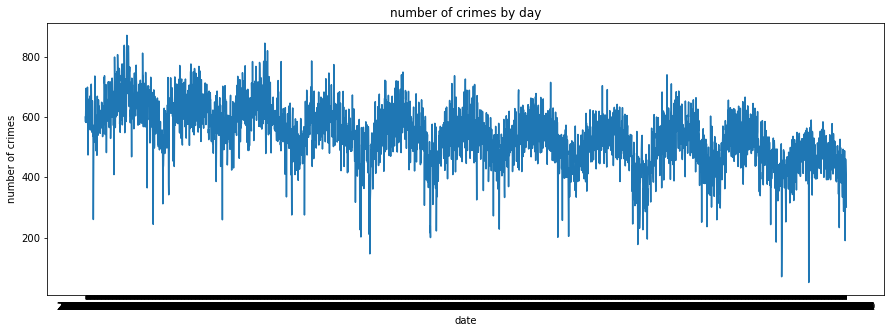

In [22]:
Dat = pd.to_datetime(df_crime.Dispatch_Date_Time)
df_crime['month'] = Dat.dt.month
df_crime['year'] = Dat.dt.year
df_crime['day'] = Dat.dt.day
Group = df_crime.groupby(['year', 'month', 'day'])['day'].count()
Count = Group.to_frame(name='count').reset_index()
fig, ax = plt.subplots(figsize=(15,5))
ax.plot_date(df_crime.Dispatch_Date.unique(), Count['count'], '-')
ax.set_ylabel('number of crimes')
ax.set_xlabel('date')
ax.set_title('number of crimes by day')

### 7. Number of crimes by Month

Text(0.5, 1.0, 'number of crimes by month')

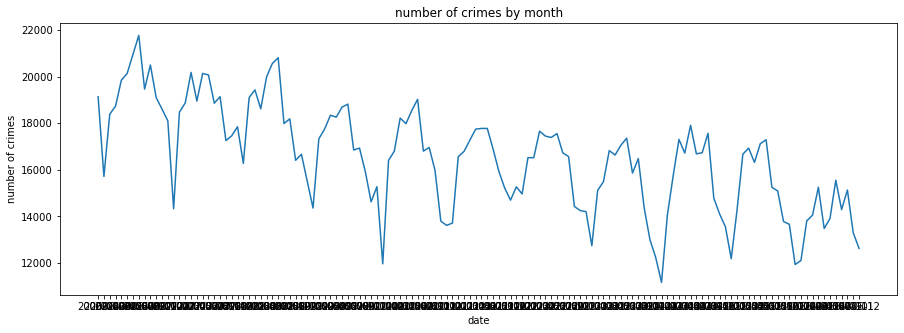

In [23]:
Dat = pd.to_datetime(df_crime.Dispatch_Date_Time)
df_crime['month'] = Dat.dt.month
df_crime['year'] = Dat.dt.year
Group = df_crime.groupby(['year', 'month'])['month'].count()
Count = Group.to_frame(name='count').reset_index()
fig, ax = plt.subplots(figsize=(15,5))
ax.plot_date(df_crime.Month.unique(), Count['count'], '-')
ax.set_ylabel('number of crimes')
ax.set_xlabel('date')
ax.set_title('number of crimes by month')

### 8. Number of crimes by Year

Text(0.5, 1.0, 'number of crimes by year')

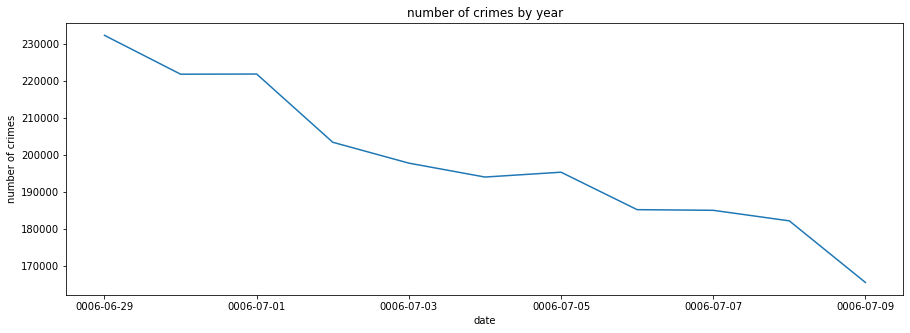

In [24]:
Group = df_crime.groupby(['year'])['year'].count()
Count = Group.to_frame(name='count').reset_index()
fig, ax = plt.subplots(figsize=(15,5))
ax.plot_date(df_crime.year.unique(), Count['count'], '-')
ax.set_ylabel('number of crimes')
ax.set_xlabel('date')
ax.set_title('number of crimes by year')

#### Looks like in summer, is made considerably more crimes than in the winter. Total number of crimes is decreasing every year.

### 9. Total number of crimes per year in each of the Police_Districts

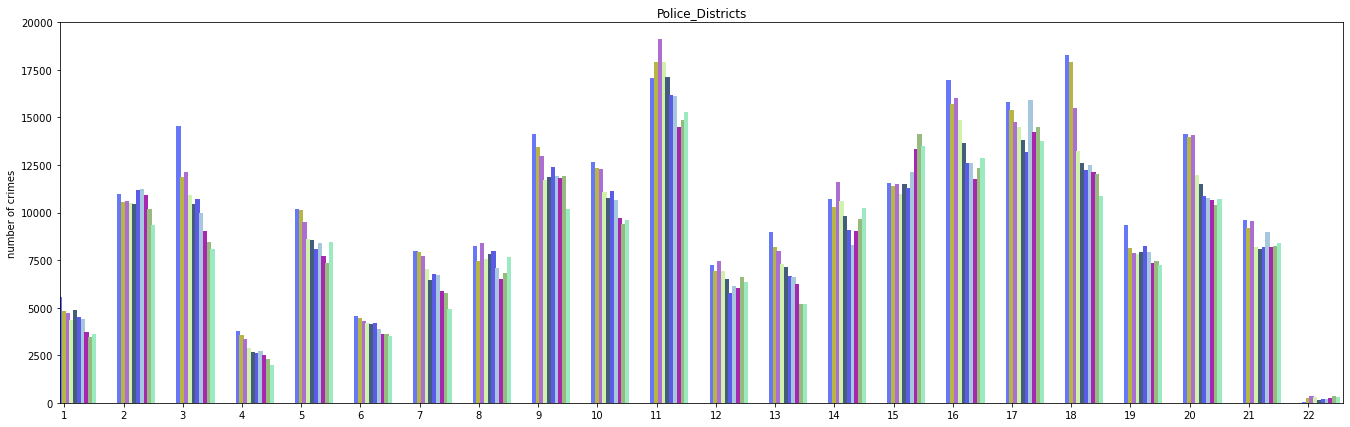

In [29]:
# Total number of crimes per year in each of the Police_Districts
from pylab import rcParams
color = np.random.rand(df_crime.Police_Districts.value_counts(sort = False).shape[0], 3)
c = 0
rcParams['figure.figsize'] = 23, 7
for i in range(2006, 2016): 
    crimes = np.array(df_crime.Police_Districts[df_crime.year == i].value_counts(sort= False))
    N = crimes.shape[0]
    ind = np.arange(N)*1.2    
    width = 0.085
    p1 = plt.bar( ind + width*c*0.9, crimes, width, color= color[c])
    plt.ylabel('number of crimes')
    plt.title('Police_Districts')
    plt.xticks(ind+width, df_crime.Police_Districts[df_crime.year == 2006].value_counts(sort= False).index)
    plt.axis([0, 26, 0.0, 20000])
    c += 1

plt.show()

#### Most police stations every year the number of crimes is reduced but there are areas where the number of crimes increased e.g.: 15.0)

### 10. Total number of crimes per year for each Text_General_Code

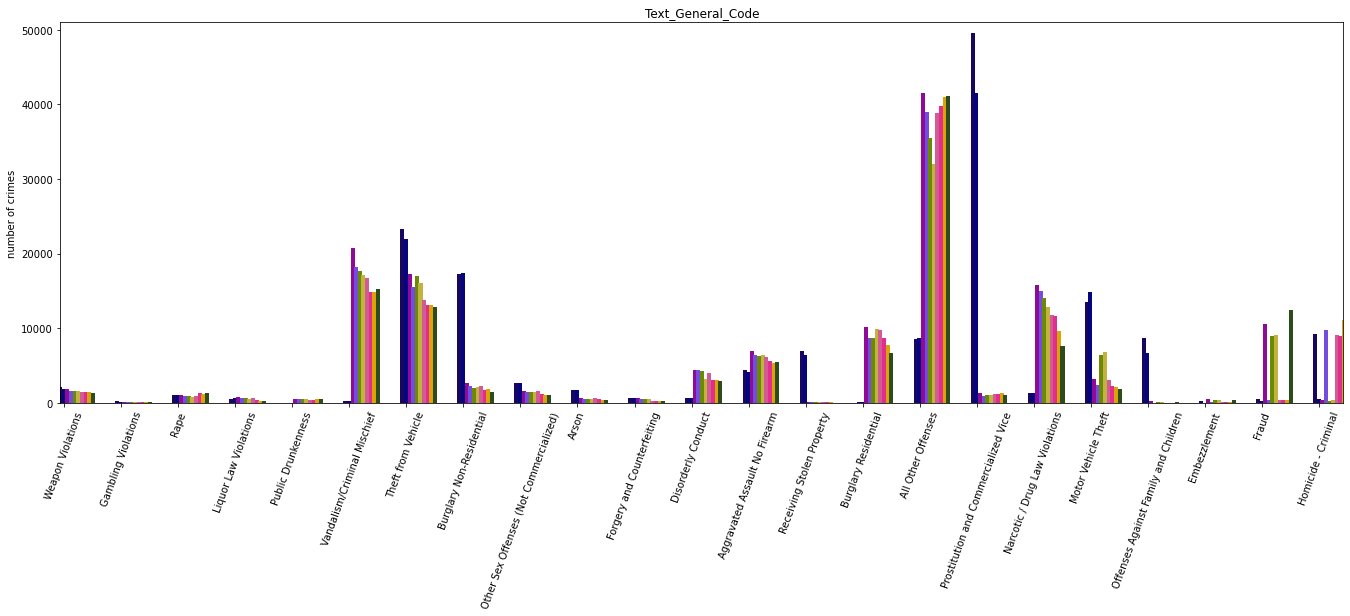

In [31]:
# Total number of crimes per year for each Text_General_Code
color = np.random.rand(df_crime.Text_General_Code.value_counts(sort= False).shape[0], 3)
c = 0
rcParams['figure.figsize'] = 23, 7
fig, ax = plt.subplots()
for i in range(2006, 2016):
    crimes = np.array(df_crime.Text_General_Code[df_crime.year == i].value_counts(sort= False))
    N = crimes.shape[0]
    ind = np.arange(N)*1.2    
    width = 0.085
    p1 = plt.bar( ind + width*c*0.9, crimes, width, color= color[c])
    plt.ylabel('number of crimes')
    plt.title('Text_General_Code')
    plt.xticks(ind+width, df_crime.Text_General_Code[df_crime.year == i].value_counts(sort= False).index, rotation = 70)
    plt.axis([0, 27, 0.0, 51000])
    c += 1

plt.show()

### 11. Total number of crimes per year in each Month

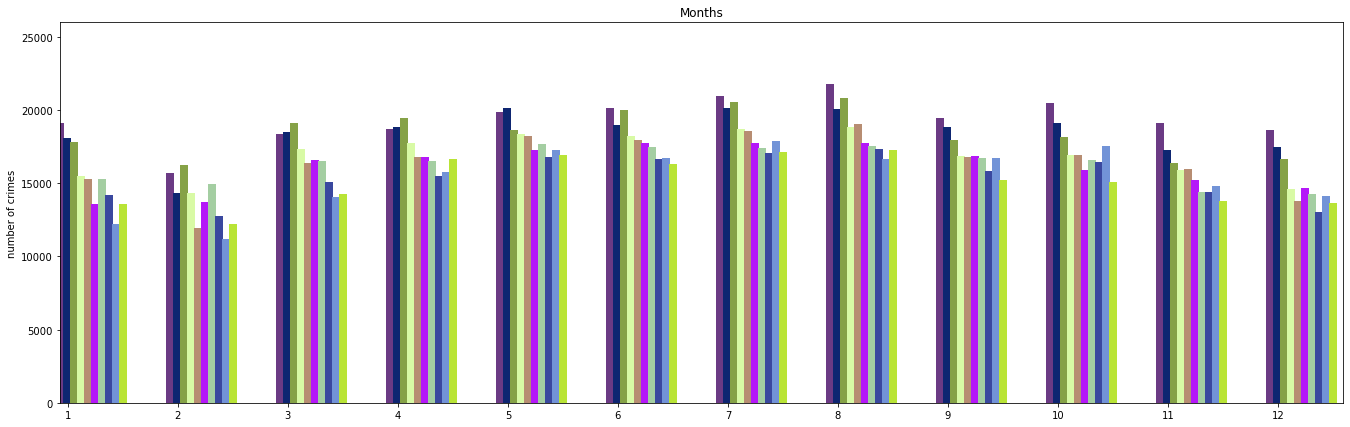

In [30]:
# Total number of crimes per year in each month
color = np.random.rand(df_crime.month.value_counts(sort= False).shape[0], 3)
c = 0
rcParams['figure.figsize'] = 23, 7
fig, ax = plt.subplots()
for i in range(2006, 2016):
    crimes = np.array(df_crime.month[df_crime.year == i].value_counts(sort= False))
    N = crimes.shape[0]
    ind = np.arange(N)*1.2    
    width = 0.085
    p1 = plt.bar( ind + width*c*0.9, crimes, width, color= color[c])
    plt.ylabel('number of crimes')
    plt.title('Months')
    plt.xticks(ind+width, df_crime.month[df_crime.year == i].value_counts(sort= False).index)
    plt.axis([0, 14, 0.0, 26000])
    c += 1

plt.show()

#### Winter there is less crime than in the summer.

### 12. Total number of crimes per year in each Hour

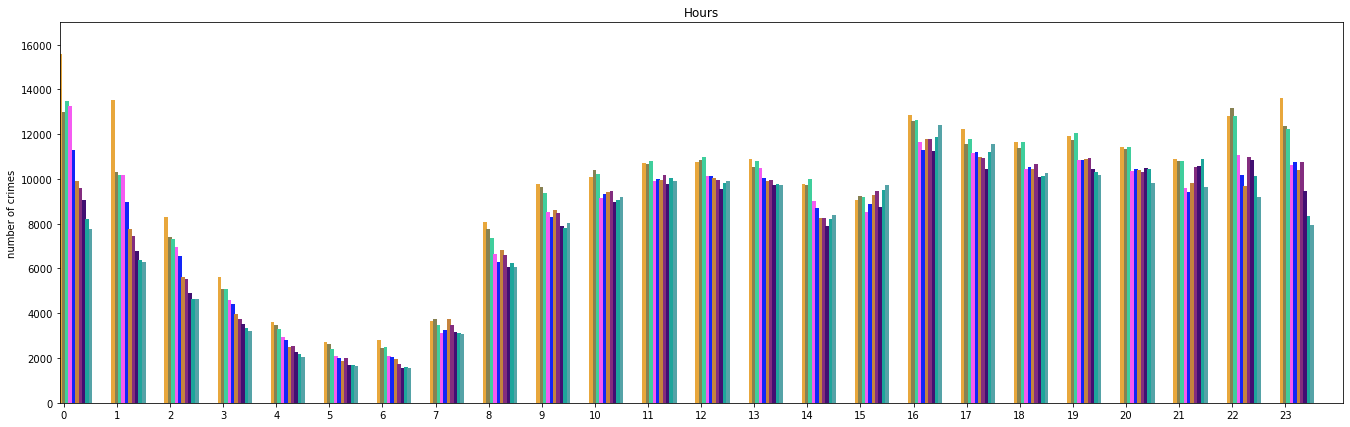

In [32]:
# Total number of crimes per year in each hour
color = np.random.rand(df_crime.Hour.value_counts(sort= False).shape[0], 3)
c = 0
rcParams['figure.figsize'] = 23, 7
fig, ax = plt.subplots()
for i in range(2006, 2016):  
    crimes = np.array(df_crime.Hour[df_crime.year == i].value_counts(sort= False))
    N = crimes.shape[0]
    ind = np.arange(N)*1.2    
    width = 0.085
    p1 = plt.bar( ind + width*c*0.9, crimes, width, color= color[c])
    plt.ylabel('number of crimes')
    plt.title('Hours')
    plt.xticks(ind+width, df_crime.Hour[df_crime.year == i].value_counts(sort= False).index)
    plt.axis([0, 29, 0.0, 17000])
    c += 1

plt.show()

#### From 3:00 - 7:00 there is less crimes. In 2015, significantly reduced the number of crimes between 23:00 - 2:00 hours than in 2006.

### Look at violent crimes by day, month, year

In [17]:
# Get the DateTime Index
df_crime['Dispatch_Date_Time'] = pd.to_datetime(df_crime['Dispatch_Date_Time'])
df_crime.set_index('Dispatch_Date_Time', inplace=True)
df_crime.sort_index(inplace=True)

In [19]:
# Get Month, Year and Day
df_crime['month'] = df_crime.index.month
df_crime['year'] = df_crime.index.year
df_crime['day'] = df_crime.index.day
df_crime['crimes'] = 1

Text(0.5, 0, 'Year of Crime')

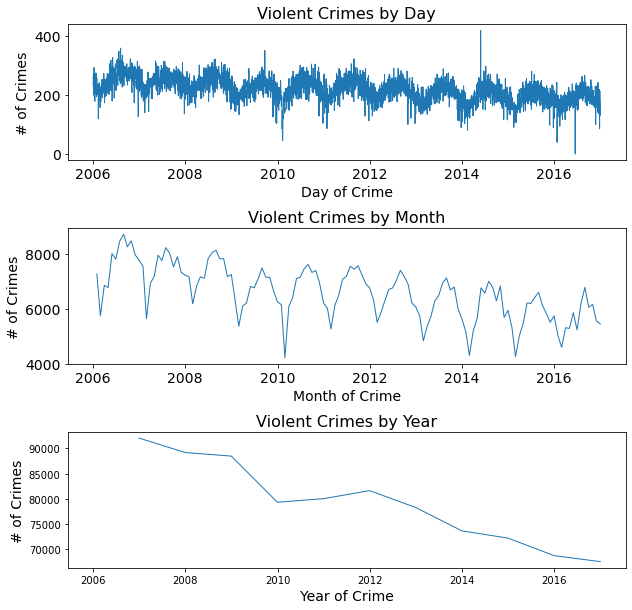

In [20]:
# Plot the violent crime
violent_df = df_crime[df_crime['UCR_General'] < 800]

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=.5)
ax1 = fig.add_subplot(3,1,1)
ax1.plot(violent_df['crimes'].resample('D').count(),linewidth=1)
ax1.set_title('Violent Crimes by Day', fontsize=16)
ax1.set_ylabel('# of Crimes', fontsize=14)
ax1.set_xlabel('Day of Crime', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)

ax2 = fig.add_subplot(3,1,2, sharex=ax1)
ax2.plot(violent_df['crimes'].resample('M').count(),linewidth=1)
ax2.set_title('Violent Crimes by Month', fontsize=16)
ax2.set_ylabel('# of Crimes', fontsize=14)
ax2.set_xlabel('Month of Crime', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

ax3  = fig.add_subplot(3,1,3, sharex=ax1)
ax3.plot(violent_df['crimes'].resample('A').count(),linewidth=1)
ax3.set_title('Violent Crimes by Year', fontsize=16)
ax3.set_ylabel('# of Crimes', fontsize=14)
ax3.set_xlabel('Year of Crime', fontsize=14)

#### Violent crimes seem to have to most noticable time series.

In [21]:
# Get the subset for now
monthly_violent_df = violent_df['crimes'].resample('M').count().to_frame()

### Visualize the Seasonal Decompisition

<li>Trends - What is the overall trend in the data?
<li>Seasonality - How does crimes fluctuate between seasons?
<li>Residuals - When removing trends and seasonaility what does the data look like?

Text(0.5, 1.0, 'Residual')

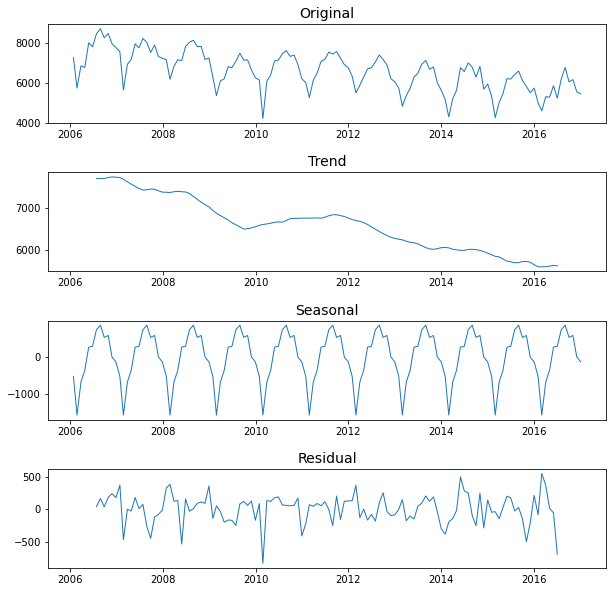

In [22]:
# Plot the seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(monthly_violent_df)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=.5)
ax1 = fig.add_subplot(4,1,1)
ax1.plot(monthly_violent_df,linewidth=1)
ax1.set_title('Original', fontsize=14)

ax2 = fig.add_subplot(4,1,2, sharex=ax1)
ax2.plot(trend,linewidth=1)
ax2.set_title('Trend', fontsize=14)

ax3  = fig.add_subplot(4,1,3, sharex=ax1)
ax3.plot(seasonal,linewidth=1)
ax3.set_title('Seasonal', fontsize=14)

ax4  = fig.add_subplot(4,1,4, sharex=ax1)
ax4.plot(residual,linewidth=1)
ax4.set_title('Residual', fontsize=14)

In [23]:
# Assign seasonal decomposition
monthly_violent_df['log_crimes'] = np.log(monthly_violent_df.crimes)
monthly_violent_df['seasonal'] = seasonal
monthly_violent_df['seasonal_decomp'] = monthly_violent_df['crimes'] - monthly_violent_df['seasonal']
monthly_violent_df['seasonal_decomp_diff'] = monthly_violent_df.seasonal_decomp.diff(1)
monthly_violent_df['monthly_diff'] = monthly_violent_df.crimes.diff(1)
monthly_violent_df['seasonal_diff'] = monthly_violent_df.crimes.diff(12)
monthly_violent_df['seasonal_monthly_diff'] = monthly_violent_df.monthly_diff - monthly_violent_df.monthly_diff.diff(12)

### Find optimal parameters for ARIMA

#### Determine optimal number or AR terms (p), MA terms (q)

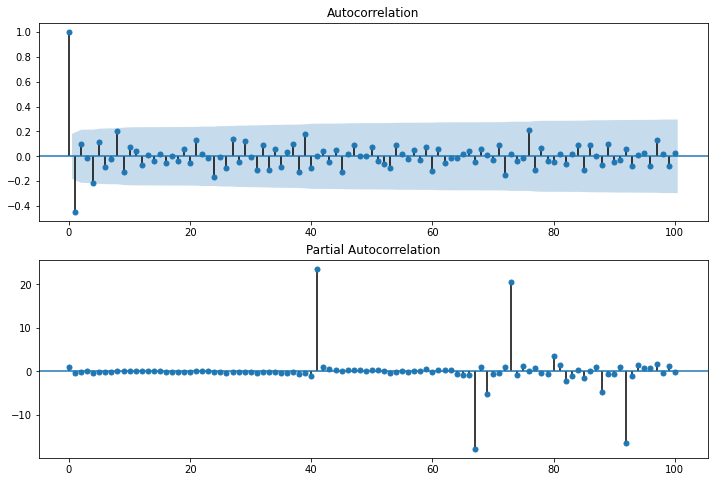

In [24]:
# Plot Autocorrelation Function (ACF) and Partial Autocorrelation Functio (PACF)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(monthly_violent_df.seasonal_decomp_diff.dropna().iloc[13:], lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(monthly_violent_df.seasonal_decomp_diff.dropna().iloc[13:], lags=100, ax=ax2)

<li>p – The lag value where the PACF chart crosses the upper confidence interval for the first time. p=1.
<li>q – The lag value where the ACF chart crosses the upper confidence interval for the first time. q=1.

### Use ACF and PACF results to fit our ARIMA model

## Fit the ARIMA model

### Determine the optimal model by measuring Mean Absolue Percentage Error

### MA(1) Model

                               ARMA Model Results                               
Dep. Variable:     seasonal_decomp_diff   No. Observations:                  131
Model:                       ARMA(0, 1)   Log Likelihood                -909.940
Method:                         css-mle   S.D. of innovations            250.948
Date:                  Tue, 01 Mar 2022   AIC                           1825.880
Time:                          22:30:01   BIC                           1834.506
Sample:                      02-28-2006   HQIC                          1829.385
                           - 12-31-2016                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -15.6044      8.237     -1.894      0.058     -31.750       0.541
ma.L1.seasonal_decomp_diff    -0.6292      0.086     -7.326      0.

Text(0.5, 0, 'Year of Crime')

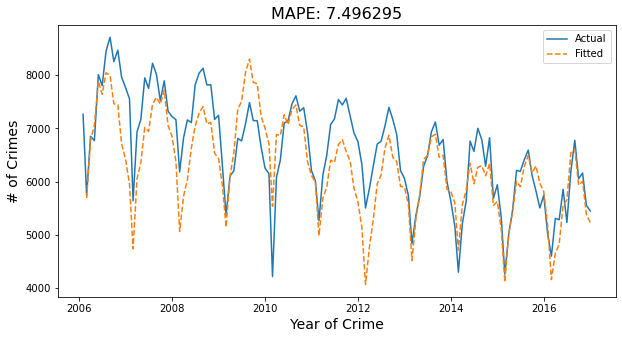

In [29]:
# Fit the ARIMA model
model = ARIMA(monthly_violent_df.seasonal_decomp_diff.dropna(),order=(0,0,1))
results = model.fit()

print (results.summary())

monthly_violent_df['forecast'] = pd.Series(monthly_violent_df.crimes.iloc[0], index = monthly_violent_df.index) \
                                .add(results.fittedvalues.cumsum()).add(monthly_violent_df.seasonal)
fig = plt.figure(figsize=(10,5))
plt.plot(monthly_violent_df.crimes, label = 'Actual')
plt.plot(monthly_violent_df.forecast,linestyle="--", label='Fitted')
plt.legend(loc='best')
plt.title('MAPE: %f' % (100*np.mean(np.abs(monthly_violent_df.forecast-monthly_violent_df.crimes)/monthly_violent_df.crimes)), fontsize=16)
plt.ylabel('# of Crimes', fontsize=14)
plt.xlabel('Year of Crime', fontsize=14)

### MAPE = 7.496295

### AR(1) Model

                               ARMA Model Results                               
Dep. Variable:     seasonal_decomp_diff   No. Observations:                  131
Model:                       ARMA(1, 0)   Log Likelihood                -912.449
Method:                         css-mle   S.D. of innovations            256.033
Date:                  Tue, 01 Mar 2022   AIC                           1830.899
Time:                          22:32:27   BIC                           1839.525
Sample:                      02-28-2006   HQIC                          1834.404
                           - 12-31-2016                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -15.8278     15.111     -1.047      0.295     -45.445      13.790
ar.L1.seasonal_decomp_diff    -0.4841      0.077     -6.302      0.

Text(0.5, 0, 'Year of Crime')

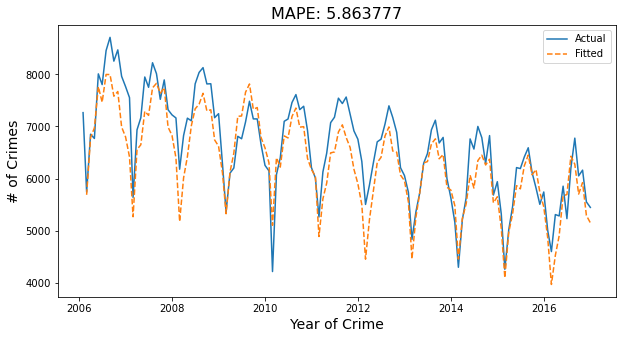

In [30]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(monthly_violent_df.seasonal_decomp_diff.dropna(),order=(1,0,0))
results = model.fit()

print (results.summary())

monthly_violent_df['forecast'] = pd.Series(monthly_violent_df.crimes.iloc[0], index = monthly_violent_df.index) \
                                .add(results.fittedvalues.cumsum()).add(monthly_violent_df.seasonal)
fig = plt.figure(figsize=(10,5))
plt.plot(monthly_violent_df.crimes, label = 'Actual')
plt.plot(monthly_violent_df.forecast,linestyle="--", label='Fitted')
plt.legend(loc='best')
plt.title('MAPE: %f' % (100*np.mean(np.abs(monthly_violent_df.forecast-monthly_violent_df.crimes)/monthly_violent_df.crimes)), fontsize=16)
plt.ylabel('# of Crimes', fontsize=14)
plt.xlabel('Year of Crime', fontsize=14)

### MAPE = 5.863777

## AR(1) Model fit with MAPE = 5.863777 looks great.